
<div align=center class="alert alert-block alert-info">
    <h1>Quantum machine learning classifier for medical data</h1>
        <h1>Hackaton Fall Fest 2021</h1>
</div>

<img src="https://qiskitfallfest.hypeinnovation.com/apps/IMT/UploadedFiles/00/f_4b2b1cfc58c0075dc3f76793261d6a49/alexander-sinn-KgLtFCgfC28-unsplash.jpg.scaledto_1332_749.jpg?v=1634525599"/>


<div align=center class="alert alert-block alert-info">
    <h1>Tabla de contenido</h1>
</div>

| Índice |
|:-|
|[Introducción](#intro)|
|[1. Aprendizaje maquina clasico](#step_1)|
|[2. Aprendizaje maquina cuántico](#step_2)|
|[3. Clasificación de datos medicos](#step_3)|
|[4. Algoritmo de clasificacion variacional cuantico](#step_2b)|
|
||
|[Implementacion del algoritmo](#challenge)|
|[Paso 1: Set de datos](#step_4)|
|[Paso 2: Normalizar set de datos](#step_5)|
|[Paso 3: Codificacion de datos](#step_6)|
|[Paso 4: Entrenamiento del modelo](#step_7)|
|[Paso 5: Prueba del modelo](#step_8)|
|Referencias|
|
|[Referencias](#qresource)|




<h2><a id='intro'>Introducción</a></h2>
El cómputo cuántico en su estado de desarrollo actual, puede implementar rutinas que mejoren las capacidades de los algoritmos clásicos, entre ellos algoritmos de aprendizaje maquina clásico, además de implementar nuevos algoritmos que aprovechen las propiedades del hardware y de las operaciones que puede computar una plataforma cuántica en la nube de IBM. En este proyecto, se propone una introducción al aprendizaje de maquina cuántico mediante un algoritmo cuántico variacional para clasificación, aplicándolo a dos conjuntos de datos médicos.

<h2><a id='step_1'>Aprendizaje máquina clásico</a></h2>

El aprendizaje máquina es un campo de las ciencias de la computación el cual aplica elementos de estadística e inteligencia artificial, con lo cual genera algoritmos que se aproximan a describir algún fenómeno, puede ser de la naturaleza, sistema o generado por otro algoritmo. El proceso para aproximarnos a estas descripciones es:

1) Reunir un conjunto de datos de dicho fenómeno. 

2) Construir un algoritmo basado en modelos estadísticos sobre el conjunto de datos.  

El término aprendizaje proviene de la parte estadística, es encontrar las relaciones estadísticas que describen el conjunto de datos y posiblemente un fenómeno en específico. 

Existen diferentes tipos de aprendizaje: supervisado, semi-supervisado, no-supervisado y por refuerzo. En este ejemplo debido a la naturaleza del problema a resolver nos enfocaremos en el aprendizaje supervisado.

## Aprendizaje supervisado
En resolución de problemas usando aprendizaje supervisado, es necesario tener un conjunto de datos clasificados, en los que existen diferentes categorías de ejemplo. A cada elemento del conjunto de datos se le llama característica y a su correspondiente categoría se le llama etiqueta. El objetivo de un algoritmo de aprendizaje supervisado es producir un modelo que tome una característica como entrada y devuelva una clasificación correcta a esa característica.




<h2><a id='step_2'>Aprendizaje máquina cuántico</a></h2>
El aprendizaje de máquina cuántico nos permite operar sobre sistemas cuánticos para procesar información clásica codificada cuánticamente o puramente cuántica, esto nos permite usar estados cuánticos para reducir la velocidad de cómputo en términos de la complejidad algorítmica. 

<h2><a id='step_3'>Clasificación de datos médicos</a></h2>
Algunos algoritmos de Machine Learning (ML) tienen el potencial de aplicarse en casi todos los campos de la medicina: creación de medicinas, ayuda en la toma de decisiones en tratamietos, detección de enfermedades, ayuda en el cuidado del paciente, entre otros.

Con la ayuda del ML, el personal dedicado al cuidado de la salud puede resolver problemas complejos, tediosos o que necesitan mucho tiempo para resolverse.

Usando algún algoritmo para clasificación, dado un dataset que contenga ciertos datos podemos hacer una clasificación entre si tiene alguna enfermedad o no.

<h2><a id='step_2b'>Algoritmo de clasificación variacional cuantico</a></h2>
Un clasificador variacional cuántico es una aplicación de los algoritmos variacionales cuánticos, los cuales nos permiten resolver problemas desafiantes para las computadoras clásicas al igual que lo hacen las redes neuronales. Este tipo de algoritmos cuánticos nos permite aproximar funciones mediante la variación de los parámetros de los circuitos variacionales, los cuales son optimizados clásicamente, que nos permite implementar un algoritmo híbrido cuántico - clásico.  La información clásica se codifica cuánticamente, se evalúan los parámetros variacionales sobre la función de costo para entrenar el circuito y los resultados son entregados al ordenador clásico el cual usa algoritmos clásicos de optimización para estimar eficientemente los nuevos parámetros, y estos son actualizados en la computadora cuántica. 

Es posible construir un algoritmo de clasificación variacional usando este enfoque. Los circuitos paramétricos introducen transformaciones lineales y se introduce un no linealidad a partir de los productos tensoriales sobre una entrada de un dato de entrada al modelo. A esta no linealidad de una compuerta unitaria $V(x)$ puede usarse como un mapa de características. Una vez que los datos se codificaron cuánticamente, se evolucionan los datos mediante una transformación lineal usando el circuito parametrizado. $U(\Theta)X(x) |\psi> $. La función de costo en su forma general está definida análogamente como el mínimo error cuadrado, el error entre la etiqueta verdadera y el valor esperado medido con respecto de un observable.

Un clasificador variacional cuántico consta de 4 elementos:
1. Encoding de datos: Codifica los datos clásicos en estados cuánticos.
2. El circuito variacional: Clasifica los datos mediante compuertas de rotación, controladas, etc. 
3. Un circuito de medición: Mide los estados cuánticos, mediante probabilidades.
4. Un algoritmo de optimización: Optimiza los parámetros del circuito variacional, mediante un algoritmo clásico. 
![imagen.png](attachment:92ab0474-0d09-4b71-8838-34183c9b3463.png)


<h2><a id='challenge'>Implementación del algoritmo</a></h2>

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator


from qiskit.ml.datasets import *
from qiskit.aqua.components.optimizers import COBYLA, ADAM, SPSA, SLSQP, POWELL, L_BFGS_B, TNC, AQGD
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, PauliFeatureMap
from qiskit.quantum_info import Statevector
#----------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#----------------------------------------------------------------------------------
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#---------------------------------------------------------------------------------
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/opt/conda/lib/python3.8/site-packages/qiskit/ml/__init__.py:40: DeprecationWarning: The package qiskit.ml is deprecated. It was moved/refactored to qiskit_machine_learning (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('ml', 'qiskit_machine_learning', 'qiskit-machine-learning')


<h2><a id='step_4'>Paso 1: Set de datos</a></h2>

#### Surveillance

La base de datos usada es COVID-19 Surveillance Data Set: 

Es una base de datos que tiene identificado a posibles fuentes de contagio de la enfermedad COVID-19 en Indonesia y si se tiene al sujeto en monitoreo o bajo vigilancia.

Códigos empleados ('1' significa que se realizó esta acción o que tiene estos síntomas, '0' significa que no se realizó esta acción o no tiene síntomas)

Posee las siguientes categorias:

A01: fiebre o historial de fiebre.

A02: Síntomas y signos de dificultad respiratoria (toz, resfriado, garganta inflamada, etc...).

A03: Neumonía severa o infecciones respiratorias agudas.

A04: Falta de razones basadas en descripciones clínicas convincentes.

A05: En los últimos 14 días previos a los síntomas, hay historial de viaje o haber vivido en lugares donde se reportaron contagios.

A06: En los últimos 14 días antes de los síntomas, hay historial de viaje o estadía en un área local de transmisión en Indonesia.

A07: Contacto con personas que dieron positivo a la enfermedad COVID-19 en los últimos 14 días.

PUS: Persona bajo vigilancia.

PIM: Persona monitoreada.

In [2]:
'''Parámetros'''
#Número de Qubits
n = 7   #7 Qubits
#Semilla Aleatoria para método de validación
RANDOM_STATE = 42
LR = 1e-3
#Nombres de clases
class_labels = ['PUS', 'PIM']

<h2><a id='step_5'>Paso 2: Normalizar set de datos</a></h2>

El primer paso en cualquier proceso de análisis de datos es la normalización de éstos. La normalización de los datos consiste en la preparación de los mismos para un posterior análisis, la normalización de los datos varía según el tipo de datos y el objetivo del análisis.  En este caso se utilizarán algoritmos cuánticos, por lo que el proceso de normalización se enfoncará a preparar los datos para este tipo de análisis.

En este proceso de normalización comenzamos mezclando los datos para introducir algo de aleatoriedad, eliminamos los atributos irrelevantes y normalizamos los datos utilizando sklearn.preprocessing.MinMaxScaler en el de $-2\pi$ a $2\pi$. Esto es para asegurarnos de que utilizamos el espacio de Hilbert de manera adecuada, ya que codificaremos los datos en estados cuánticos a través de ángulos de rotación. Dividimos los datos en un conjunto de entrenamiento para crear el modelo y un conjunto de prueba para probar el modelo, manteniendo el tamaño del conjunto de prueba en el 45% del conjunto de datos total.

In [3]:
'''Normalizamos los datos'''
def normalizeData(DATA_PATH = "Surveillance2.csv"):
    """
    Normalizes the data
    """
    # Lee el dataset
    data = pd.read_csv(DATA_PATH)
    #Desordenamos aleatoriamente el dataset
    data = shuffle(data, random_state=RANDOM_STATE)
    #Guardamos en X los datos de los atributos y en Y las clases
    X, Y = data[['A01', 'A02', 'A03', 'A04','A05','A06','A07']].values, data['Categories'].values
    # normalizamos los datos en un rango de -2pi a 2pi
    scaler = MinMaxScaler(feature_range=(-2 * np.pi, 2 * np.pi))
    X = scaler.fit_transform(X)
    #Partimos nuestro dataset para entrenamiento y prueba (Test y Train)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)
    return X_train, X_test, Y_train, Y_test

<h2><a id='step_6'>Paso 3: Codificación de datos</a></h2>
## Quantum Encoding

Para codificar nuestros datos en estados cuánticos, usaremos un Feature Map.

Un Feature Map es una función que actua de la siguiente forma:

$\phi: \chi \to \digamma$

Donde $\digamma$ es el Feature Space y $\chi$ es el conjunto de datos de entrada.

La salidas del mapeo en los puntos de datos individuales, $\phi(x)$ para todo $x \in \chi$, se les conoce como vectores de características 

![imagen.png](attachment:4c56f694-eb2e-42d6-be80-207116465f2c.png)

![imagen.png](attachment:839f9afb-33fd-4227-a513-c5f5753b88d9.png)

Un mapa de características cuántico (Quantum feature map) es un mapa de características donde $\digamma$ es un espacio vectorial, en cuántica: Espacio de Hilbert; y los vectores de características son estados cuánticos. El mapeo transforma x→|ϕ(x)⟩ como una transformación unitaria $U_{\phi} (x)$ que depende de los datos de entrada.

En este ejercicio se usará ZZFeatureMap, que es uno de los feature maps más usados en Quantum Machine Learning (QML). 

$\phi$ es una función clásica no lineal, el cual por defecto es $\phi(x)=x$ si $\phi(x,y)=(\pi-x)(\pi-y)$.

ZZFeatureMap es un circuito cuántico, en qiskit, que esta compuesto por compuertas de fase eje z y la X controlada. Donde:

$\begin{split}U1(\theta) =
    \begin{pmatrix}
        1 & 0 \\
        0 & e^{i\theta}
    \end{pmatrix}\end{split}$
    
$\begin{split}CX\ q_0, q_1 =
    I \otimes |0\rangle\langle0| + X \otimes |1\rangle\langle1| =
    \begin{pmatrix}
        1 & 0 & 0 & 0 \\
        0 & 0 & 0 & 1 \\
        0 & 0 & 1 & 0 \\
        0 & 1 & 0 & 0
    \end{pmatrix}\end{split}$

![imagen.png](attachment:821bf412-2e9d-4a1b-80bb-35930751f78e.png)

Cada atributo del dataset es un qubit. En este ejemplo, tenemos 7 atributos ('A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07' ), por lo que tendremos 7 qubits.

El circuito utilizado, RealAmplitudes, es uno de los diferentes formas de hacer un circuito variacional, se utiliza comúnmente en QML. El circuito consta de capas alternadas con compuertas de rotaciones Y y compuertas x controladas. Se llama RealAmplitudes ya que los estados cuánticos preparados solo tendrán amplitudes reales, la parte compleja siempre es 0.

![imagen.png](attachment:651d62f0-b0e2-4d7a-8258-0479890e9191.png)

/tmp/ipykernel_301/2592169798.py:9: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = feature_map.combine(var_form)
/opt/conda/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


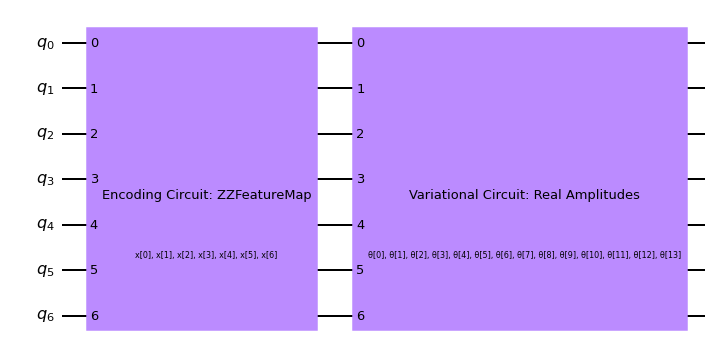

In [4]:
'''Inicializamos el Circuito Cuántico'''
#Creamos el vector de estados con n qubits
sv = Statevector.from_label('0'* n)
#Encoding por Feature Map
feature_map = ZZFeatureMap(n, reps=2, name='Encoding Circuit: ZZFeatureMap')
#Circuito Variacional
var_form = RealAmplitudes(n, reps=1, insert_barriers=True, name='Variational Circuit: Real Amplitudes')
#Combinamos los circuitos
circuit = feature_map.combine(var_form)
#Imprimimos los circuitos
feature_map.draw(output='mpl',filename="fm.png" )
var_form.draw(output='mpl', filename="vc.png")
circuit.draw(output='mpl', filename="c.png")

<h2><a id='step_7'>Paso 4: Entrenamiento del modelo</a></h2>

Guardamos los parámetros obtenidos

In [5]:
'''Función para obtener los parámetros del sistema'''
def get_data_dict(params, x):
    parameters = {}
    #Obtenemos los parámetros del circuito de encoding
    for i, p in enumerate(feature_map.ordered_parameters):
        parameters[p] = x[i]
    #Obtenemos los parámetros del circuito variacional de clasificación
    for i, p in enumerate(var_form.ordered_parameters):
        parameters[p] = params[i]
    #print(parameters)
    return parameters

In [6]:
'''Asigna Etiquetas'''
def assign_label(bit_string, class_labels):
    hamming_weight = sum([int(k) for k in list(bit_string)])
    #Se cuenta cuantas etiquetas de cada clase hay 
    is_odd_parity = hamming_weight & 1
    #¿Es impar?
    if is_odd_parity:
        return class_labels[1]
    #¿Es par?
    else:
        return class_labels[0]  

In [7]:
''' Regresa las Probabilidades'''
def return_probabilities(counts, class_labels):
    shots = sum(counts.values())
    result = {class_labels[0]: 0,
    class_labels[1]: 0}
    for key, item in counts.items():
        label = assign_label(key, class_labels)
        result[label] += counts[key]/shots
    return result

In [8]:
def classify(x_list, params, class_labels):
    qc_list = []
    for x in x_list:
        circ_ = circuit.assign_parameters(get_data_dict(params, x))
        qc = sv.evolve(circ_)
        qc_list += [qc]
        probs = []
    for qc in qc_list:
        counts = qc.probabilities_dict()
        prob = return_probabilities(counts, class_labels)
        probs += [prob]
    return probs

In [9]:
def mse_cost(probs, expected_label):
    p = probs.get(expected_label)
    actual, pred = np.array(1), np.array(p)
    return np.square(np.subtract(actual,pred)).mean()

In [10]:
cost_list = []
def cost_function(X, Y, class_labels, params, shots=100, print_value=False):
    # map training input to list of labels and list of samples
    cost = 0
    training_labels = []
    training_samples = []
    for sample in X:
        training_samples += [sample]
    for label in Y:
        if label == 'PUS':
            training_labels += [class_labels[0]]
        elif label == 'PIM':
            training_labels += [class_labels[1]]
    probs = classify(training_samples, params, class_labels)
    # evaluate costs for all classified samples
    for i, prob in enumerate(probs):
        cost += mse_cost(prob, training_labels[i])
    cost /= len(training_samples)
    cost_list.append(cost)
    return cost

In [11]:
cost_list = []
def train_model(optimizer):
    # Se define una funcion objetivo para entrenar
    objective_function = lambda params: cost_function(X_train, Y_train, class_labels, params, print_value=True)
    # Se inicilizan aleatoriamente los parametros
    np.random.seed(RANDOM_STATE)
    init_params = 2*np.pi*np.random.rand(n*(1)*2)
    # Se entrena modelo
    opt_params, value, _ = optimizer.optimize(len(init_params), objective_function, initial_point=init_params)
    # Implime resultados
    print('\n Parametros de optimizacion\n:', opt_params)
    print('\n Valor de optimizacion \n: ', value)
    fig = plt.figure()
    plt.plot(range(0,len(cost_list),1), cost_list)
    plt.xlabel('StIteracionese')
    plt.ylabel('Resultado de la funciond de costo')
    plt.title("Costo vs iteraciones")
    plt.show()
    return opt_params


<h2><a id='step_8'>Paso 5: Prueba del modelo</a></h2>

In [12]:
def test_model(X, Y, class_labels, params):
    accuracy = 0
    training_labels = []
    training_samples = []
    for sample in X:
        training_samples += [sample]
    probs = classify(training_samples, params, class_labels)
    for i, prob in enumerate(probs):
        if (prob.get('PUS') >= prob.get('PIM')) and (Y_test[i] == 'PUS'):
            accuracy += 1
        elif (prob.get('PIM') >= prob.get('PUS')) and (Y_test[i] == 'PIM'):
            accuracy += 1
    accuracy /= len(Y_test)
    print("Test accuracy: {}\n".format(accuracy))


# Tipos de optimización empleados

### COBYLA (Constrained optimization by linear approximation)

Es una optimización numérica para problemas de restricciones la cual puede encontrar el vector $\vec{x} \in S$, siendo $S\subseteq \mathbf{R}^n$, que tenga la mínima, o máxima, $f(x)$ sin conocer $\nabla f$.

Inventado por Michael J. D. Powell (A Direct Search Optimization Method That Models the Objective and Constraint Functions by Linear Interpolation), realiza lo anterior aproximando iterativamente el problema de optimización restringido con problemas de programación lineal. En pocas palabras, en una iteración se resuelve un problema de programación lineal el cual arroja un candidato para la solución óptima. Posteriormente, se evalúa el candidato obtenido usando las funciones objetivo y de restricción originales, generando un nuevo dato en el espacio de optimización. Con esta nueva información, se realiza una nueva iteración para mejorar la aproximación de un nuevo problema de programación lineal. Cuando la solución no puede mejorar más, se reduce el paso de las iteraciones y, cuando son suficientemente pequeñas, termina el algoritmo.

Algunas aplicaciones son:

+ Planificación.
+ Búsqueda óptima.
+ Asignación de recursos.
+ Optimización de redes.

### ADAM (Adaptive Movement Estimation Algorithm)

Es un algoritmo de optimización que emplea el enfoque de otros dos métodos de descenso de gradiente estocástico: AdaGrad, mantiene una tasa de aprendizaje por parámetro la cual mejora el rendimiento en problemas con gradientes escasos; y RMSProp (Root Mean Square Propagation), mantiene tasas de aprendizaje por parámetro que se adaptan en función del promedio de magnitudes recientes de los gradientes para el peso. Esta última característica permite que, así como RMSProp, ADAM funcione bien para problemas en línea o no estacionarios (con ruido).

A diferencia de RMSProp, ADAM no sólo adapta las tasas de aprendizaje de los parámetros en función del primer momento promedio (la media), sino también usa el promedio de los segundos momentos de los gradientes (la varianza no centrada). De forma concreta, el algoritmo calcula un promedio móvil exponencial del gradiente y el gradiente al cuadrado, y los parámetros $\beta_1$ y $\beta_2$ controlan las tasas de caída de estos promedios móviles.

Actualización del valor $\alpha$

$\alpha (t) = \alpha * \frac{\sqrt{1 - \beta_2(t)}}{1 - \beta_1(t)}$

Los parámetros son:

$\alpha$ Tasa de aprendizaje o tamaño de paso. Es la proporción en la que se actualizan las ponderaciones (puede ser 0.01). Entre más grande sea el valor (0.4, por ejemplo), el aprendizaje inicial es más rápido, mientras que valores pequeños (0.00001) ralentizan el aprendizaje.

$\beta_1$ La tasa de caída exponencial para las estimaciones del primer momento.

$\beta_2$ La tasa de caída exponencial para las estimaciones del segundo momento. Este valor debe establecerse cerca de 1.0 en problemas con un gradiente escaso.

$\epsilon$ Un número muy pequeño para evitar cualquier división por cero en la implementación.

Algunas aplicaciones son:

+ Procesamiento de Lenguaje Natrual.
+ Visión artificial.
+ Deep Learning.
+ Simulación.

### SPSA (Simultaneous perturbation stochastic approximation)

Es un método general para minimizar funciones multivariadas diferenciables, especialmente útil para funciones cuyo gradiente es imposible de evaluar o computacionalmente costoso. Provee un método estocástico para aproximar el gradiente de una función de costo diferenciable multivariable. Lo anterior lo realiza evaluando dos veces la función de costo usando parámetros de vectores peturbados: cada elemento del vector de parámetros original es desplazado por un valor aleatorio generado. Esta característica es lo que diferencía a este método de los métodos de diferencias finitas: en estos últimos, sólo un elemento del vector de parámetros es desplazado por evaluación.

Al igual que los métodos basados en gradientes, SPSA comienza con un vector de parámetros inicial $\hat{\Theta}$ y, después de _k_ iteraciones, los _k+1_ parámetros iterados se pueden obtener de la siguiente forma:

$\hat{\Theta_{k+1}} = \hat{\Theta_k} - a_k\hat{g_k}(\hat{\Theta_k})$


$\hat{g_k}$ es el gradiente $g(\Theta) = \frac{\partial L}{\partial \Theta}$ en la iteración $\Theta_k$; $a_k$ es un entero positivo.

Una de las más grandes ventajas de SPSA por sobre otros métodos es el poco costo computacional. Si el problema de optimización tiene una dimensionalidad de _p_,al requerir sólo dos mediciones de funciones objetivo por iteración, lo que es posible toda vez que no importa la dimensión del problema a optimizar para SPSA, hace que su costo computacional sea _p_ veces menor al de un método de diferencia finita, el cual tendría que realizar _2p_ medidas. Otra característica importante es que es muy útil para funciones que presentan ruido, ya que se adapta muy bien a estos casos.

Algunas aplicaciones son:

+ Diseño de circuitos.
+ Imágenes médicas.
+ Óptica adaptativa.
+ Control de interfaces humano-copmutadora.

/opt/conda/lib/python3.8/site-packages/qiskit/aqua/components/optimizers/optimizer.py:49: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.components.optimizers',
/opt/conda/lib/python3.8/site-packages/qiskit/aqua/components/optimizers/spsa.py:237: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  delta = 2 * aqua_globals.random.integers(2, size=np.shape(initial_theta)[0]) - 1



 Parametros de optimizacion
: [ 2.94323616  7.64930349  4.69613929  5.23705346  0.09711974  4.34027796
  0.13707787  7.50995068  4.9919335   5.81123405 -1.6813459   6.34234746
  4.61168277  2.96283804]

 Valor de optimizacion 
:  0.15924749481092715


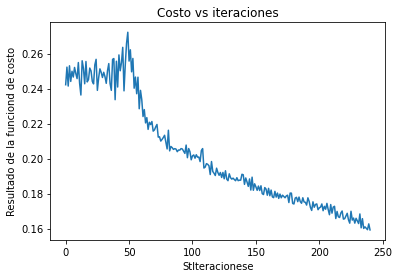

Test accuracy: 0.75



'El accuracy o exactitud expresa el porcentaje de casos que el modelo ha acertado, \nes decir, ha clasificado correctamente basandose en el conjunto de entrenamiento. \nEsta es una de las métricas más usadas y se usa con datasets balanceados'

In [13]:
''' Parte de Entrenamiento'''
#El usuario puede elegir que optimizador usar
X_train, X_test, Y_train, Y_test = normalizeData() #inicia_algoritmo
SPSA_opt = SPSA(maxiter=100) #Optimizador SPSA
ADAM_opt = ADAM(maxiter=100) #Optimizador ADAM
COBYLA_opt = COBYLA(maxiter=100) #Optimizador COBYLA
opt_params=train_model(SPSA_opt)  #Optimizador usado
test_model(X_test, Y_test, class_labels, opt_params)
'''El accuracy o exactitud expresa el porcentaje de casos que el modelo ha acertado, 
es decir, ha clasificado correctamente basandose en el conjunto de entrenamiento. 
Esta es una de las métricas más usadas y se usa con datasets balanceados'''

<h2><a id='qresource'>Referencias</a></h2>

1. Biamonte J, Wittek P, Pancotti N, Rebentrost P, Wiebe N, Lloyd S. Quantum machine learning. Nature [Internet]. 2017;549(7671):195–202. Available from: http://dx.doi.org/10.1038/nature23474

2. Lloyd S, Schuld M, Ijaz A, Izaac J, Killoran N. Quantum embeddings for machine learning. arXiv. 2020;1–11. 

3. Havlíček V, Córcoles AD, Temme K, Harrow AW, Kandala A, Chow JM, et al. Supervised learning with quantum-enhanced feature spaces. Nature. 2019;567(7747):209–12. 

4. Schuld M, Killoran N. Quantum Machine Learning in Feature Hilbert Spaces. Phys Rev Lett. 2019;122(4). 

5. Gil Fuster EM. Variational Quantum Classifier. 

6. Schuld M, Bocharov A, Svore KM, Wiebe N. Circuit-centric quantum classifiers. Phys Rev A. 2020;101(3):1–17. 

7. "Qiskit". Qiskit. https://qiskit.org/ 

8. "PennyLane". PennyLane. https://pennylane.ai/ 
9. 'UCI Machine Learning Repository', 1987 [Online]. Recueprada de: https://archive.ics.uci.edu/ml/datasets/COVID-19+Surveillance.
